<a href="https://colab.research.google.com/github/tphlabs/Lab4_FH_teach/blob/main/FH_lab_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Frank-Hertz experiment

Igor Gitelman, 2024, v0.3
Evgeny Kolonsky 2024

<p>Here we need to import mesured data from the mesuring program and then plot it. As you alredy know we need to plot the Frank-Hertz curve (characteristic curve).</p>

<p>We start from importing general modules that we use here, and in most of the lab expiriments.</p>

In [19]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.signal import find_peaks as find_peaks # Find peaks inside a signal based on peak properties.

from scipy.signal import savgol_filter


<p> In the future we use other modules too.</p>
<p>Now we use the <b>pandas</b> module, we called him <b>pd</b>, to import the data from file "FH1.csv", where the ending ".csv" stand for <b>comma separated value</b>. Pay attention that the actual separator may be different.</p>

In [2]:
# Place path to your data here.
# When using Ananconda locally UPLOAD your data to Anaconda environment.
URL = 'd:/fh.csv'

fh1=pd.read_csv(URL, sep='\t',header=5)
fh1

,Va(V)_1,Ia(E-12 A)_1,T(c)_1
0,0.00,15.17,170.42
1,0.01,15.11,170.42
2,0.02,15.31,170.42
3,0.03,15.32,170.42
4,0.04,15.47,170.42
...,...,...,...
2996,29.96,33.88,169.89
2997,29.97,34.02,169.90
2998,29.98,33.91,169.90
2999,29.99,34.11,169.89


About this function you can read [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) or just google it. '\t' stays for tab separator between columns. The function
starts to read from line 5 that contains the column names, because of "header=5".

Take the names of the columns, and create relevant variables

In [5]:
v = np.array(fh1['Va(V)_1']) # accelerating voltage vector
I = np.array(fh1['Ia(E-12 A)_1']) # Current vector
T = np.array(fh1['T(c)_1']) #temperature vector

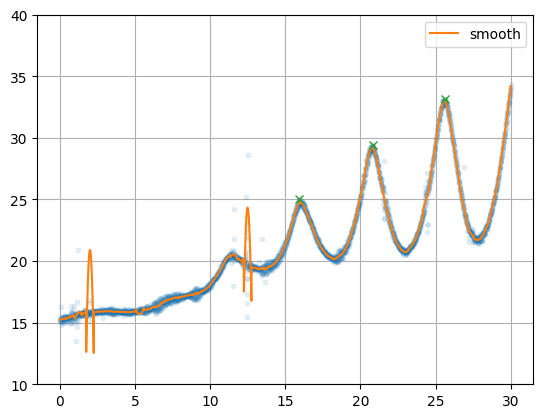

In [33]:
plt.plot(v,I,'.', alpha=0.1)
plt.grid()
plt.ylim(10, 40)

Ihat = savgol_filter(I, 51, 2) # window size 51, polynomial order 3
plt.plot(v,Ihat, label='smooth')

peaks, _ = find_peaks(I, prominence=5, width=5 )
plt.plot(v[peaks], I[peaks], 'x')

plt.legend()

and set the heater current, retard voltage

In [4]:
Heater_Current=0.320 #A
V_retard= 1.5 #V

We find the peaks of the characteristic curve  

<h2>Data plot</h2>

<p>Now we use <b>matplotlib.pyplot</b> we called him <b>plt</b> in order to plot the data.</p>

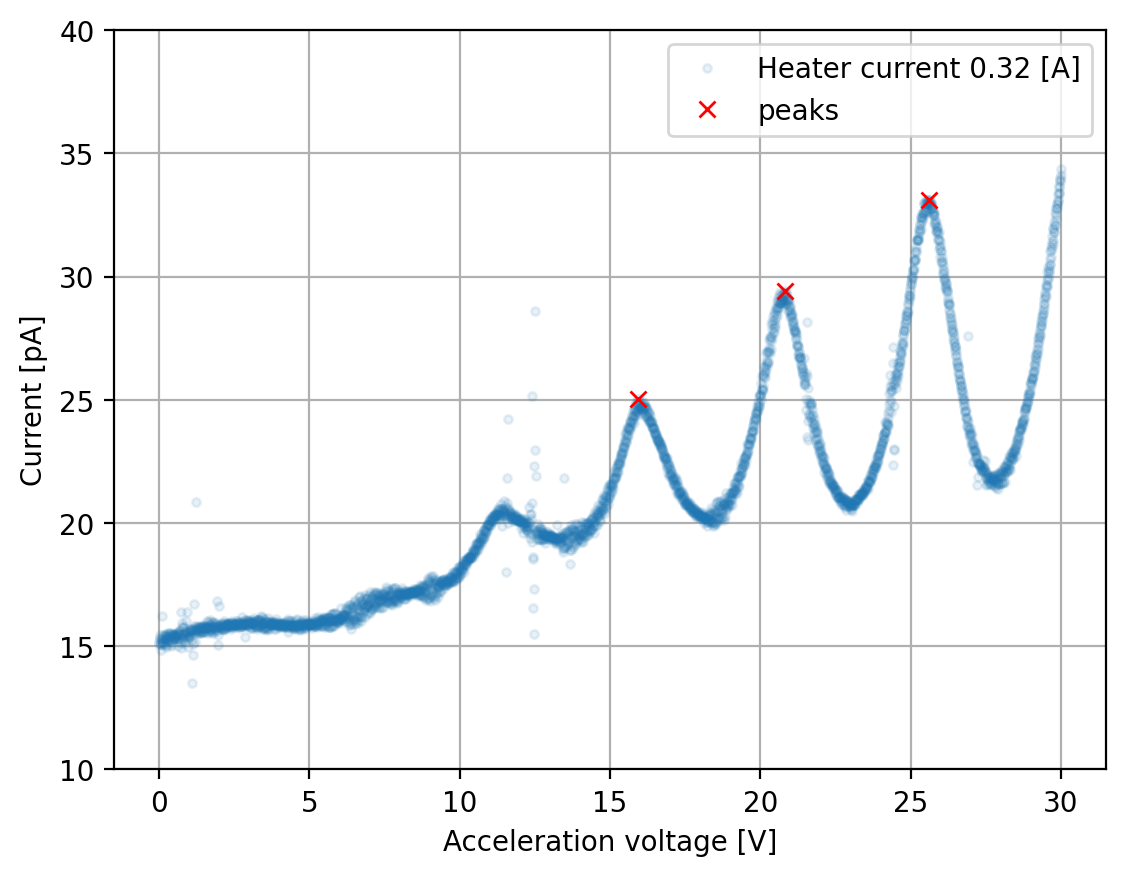

In [18]:
plt.figure(dpi=200) # Define new figure, and set "Dots per Inch" or "dpi"
plt.plot(v,I, '.', alpha=0.1,
         label='Heater current {:.2f} [A]'.format(Heater_Current)) # plot the line and save the appropriate label.
plt.plot(v[peaks],I[peaks],'x',color='red' , label='peaks') #plot the peaks
plt.ylabel('Current [pA]') #Y axis label
plt.xlabel('Acceleration voltage [V]') #X axis label
plt.grid() #put grid, optional
plt.ylim(10, 40)
plt.legend() # put the legends

And the distances between pick voltages

In [34]:
DE=np.diff(v[peaks])
DE

array([4.87, 4.81])